In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt

In [3]:
"""
Arguments:
    k      - number of arms
    minq   - minimum value of q_star for each arm
    maxq   - maximum value of q_star for each arm
    stddev - standard deviation that randomize the values while action is executed
"""

class Bandit:
    def __init__(self, q_star, stddev=2):
        self.stddev = stddev
        self.q_star = q_star

    def execute(self, arm):
        return self.q_star[arm] + np.random.normal(scale=self.stddev)

In [4]:
bandit = Bandit([4, 5, 3, 3, 1, 2, 0, 1, 5, 1])
print(bandit.q_star)
bandit.execute(3)

[4, 5, 3, 3, 1, 2, 0, 1, 5, 1]


6.31630185492306

In [5]:
class RandomAgent:
    def __init__(self, bandit):
        """
        Arguments:
            bandit - bandit that the agent will operate on (used only to set initial values of q_est and n)
        """
        self.q_est =  [0] * len(bandit.q_star)
        self.n =  [0] * len(bandit.q_star)
                
    def act(self, bandit):
        """
        Performs an action (selects an arm randomly) and updates corespondingn q_est and n values
        Arguments:
            bandit - bandit that the agent is operated on
        Returns:
            reward - reward from the bandit (a result of the performed action)
        """
        arm = np.random.randint(len(self.q_est))
        reward = bandit.execute(arm)
        self.n[arm] += 1
        
        # Q_n+1 = Qn + (1 / n) * (R - Q_n)
        self.q_est[arm] += (reward - self.q_est[arm]) / self.n[arm]
        
        return reward

In [6]:
agent = RandomAgent(bandit)
rewards = []
for step in range (1000):
    reward = agent.act(bandit)
    rewards.append(reward)

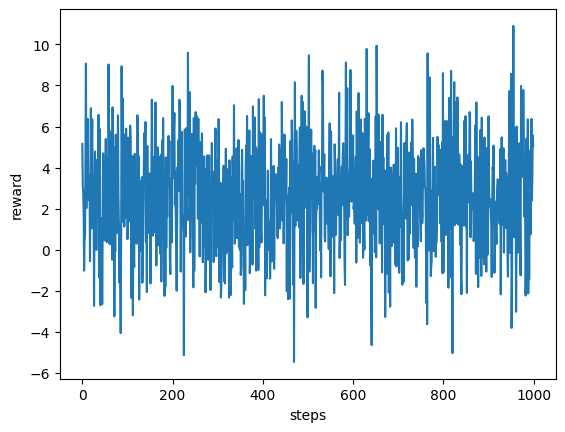

In [7]:
def plot_rewards (rewards):
    """
    Plots the rewards
    """
    f = plt.figure()
    plt.plot(rewards)
    plt.xlabel('steps')
    plt.ylabel('reward')
    plt.show()
    
plot_rewards(rewards)

In [8]:
def display_agent(agent, bandit):
    """
    Displays the agent data, namely:
    q_star - real expected rewards from the bandit
    q_est  - expected rewards extimated by the agent
    n      - how many times the agent selected this particular arm
    """
    df = pd.DataFrame()
    df['q_star'] = bandit.q_star
    df['q_est'] = agent.q_est
    df['n'] = agent.n
    return df

display_agent(agent, bandit)

,q_star,q_est,n
0,4,3.983276,100
1,5,5.112449,106
2,3,2.970921,106
3,3,2.935162,92
4,1,1.441375,90
5,2,1.828761,111
6,0,0.225629,90
7,1,0.715403,114
8,5,5.179662,103
9,1,1.254352,88


In [9]:
class EpsilonGreedyAgent:
    def __init__(self, bandit, epsilon = 0.1):
        """
        Arguments:
            bandit - bandit that the agent will operate on (used only to set initial values of q_est and n)
            epsilon - exploration parameter 
        """        
        self.q_est = [0] * len(bandit.q_star)
        self.n =  [0] * len(bandit.q_star)
        self.epsilon = epsilon
        
    def act(self, bandit):
        """
        Performs an action (uses epsilon-greedy approach to select an arm)
        and pdates corespondingn q_est and n values
        Arguments:
            bandit - bandit that the agent is operated on
        Returns:
            reward - reward from the bandit (a result of the performed action)
        """        
        if np.random.random() > self.epsilon:
            arm = np.argmax(self.q_est)
        else:
            arm = np.random.randint(len(self.q_est))
        reward = bandit.execute(arm)
        self.n[arm] += 1
        
        # Q_n+1 = Qn + (1 / n) * (R - Q_n)
        self.q_est[arm] += (reward - self.q_est[arm]) / self.n[arm]
        
        return reward

In [10]:
total_rewards = []
for loop in tqdm(range (2000)):
    agent = EpsilonGreedyAgent(bandit)
    rewards = []
    for step in range (1000):
        reward = agent.act(bandit)
        rewards.append(reward)
    
    total_rewards.append(rewards)
total_rewards = np.asarray(total_rewards)
rewards = total_rewards.mean(axis=0)
print (rewards.shape)

100%|██████████| 2000/2000 [00:13<00:00, 153.53it/s]


(1000,)


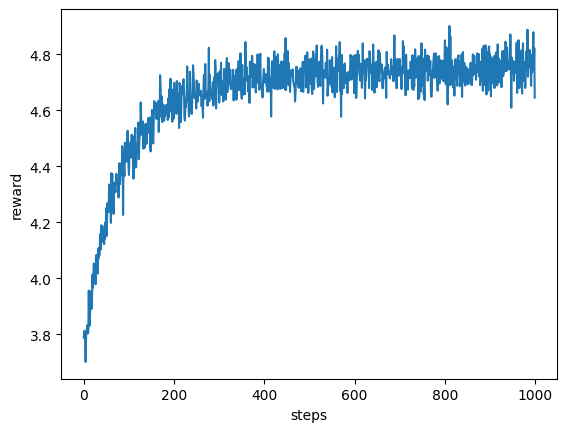

,q_star,q_est,n
0,4,3.813660,17
1,5,3.998870,24
2,3,0.987973,5
3,3,2.955872,7
4,1,0.885405,11
5,2,1.077748,7
6,0,1.414885,10
7,1,0.362133,14
8,5,5.101645,900
9,1,1.973211,5


In [11]:
plot_rewards(rewards)
display_agent(agent, bandit)

In [12]:
df_rewards = pd.DataFrame()
df_rewards['eGreedy'] = rewards

In [13]:
"""
Task 1 - Optimistic agent
Please fill in the placeholders to implement the optimistic agent. Generally, you are suppose to prepate the __init__ and act methods.

In the __init__ method you should set the initial values optimistically.

In the act method you should:
- Perform an action (select the arm greedily based on the estimated values)
- Update the corresponding estimated value    
"""
class OptimisticAgent:
    def __init__(self, bandit, initial_value = 10):
        """
        Arguments:
            bandit - bandit that the agent will operate on (used only to set initial values of q_est and n)
            initial_value - initial value for estimated q_star. It should be high enough to make the algorithm work
        """
        self.q_est = [initial_value] * len(bandit.q_star) #Enter your code here
        self.n =  [0] * len(bandit.q_star)
        self.initial_value = initial_value
                
    def act(self, bandit):
        """
        Performs an action (selects an arm greedily based on the estimated q_star values ) 
        and updates corespondingn q_est and n values
        Arguments:
            bandit - bandit that the agent is operated on
        Returns:
            reward - reward from the bandit (a result of the performed action)
        """
        
        arm = np.argmax(self.q_est)
        reward = bandit.execute(arm) # Enter your code here
        self.n[arm] += 1
        
        # Q_n+1 = Qn + (1 / n) * (R - Q_n)
        self.q_est[arm] += (reward - self.q_est[arm]) / self.n[arm]
        
        return reward

In [14]:
total_rewards = []

for loop in tqdm(range (2000)):
    agent = OptimisticAgent(bandit)
    rewards = []
    
    for step in range (1000):
        reward = agent.act(bandit)
        rewards.append(reward)
    
    total_rewards.append(rewards)

total_rewards = np.asarray(total_rewards)
rewards = total_rewards.mean(axis=0)

100%|██████████| 2000/2000 [00:11<00:00, 171.67it/s]


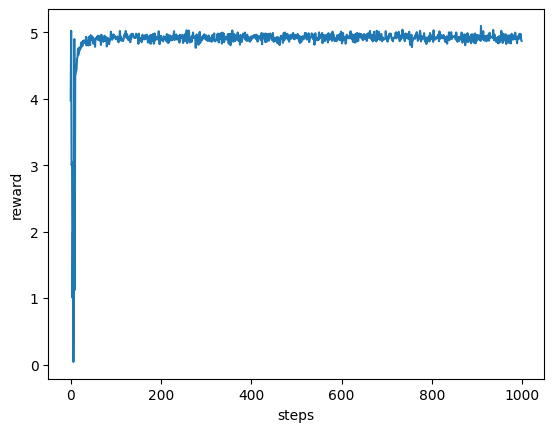

,q_star,q_est,n
0,4,2.698111,1
1,5,4.933330,988
2,3,2.899810,1
3,3,3.642104,3
4,1,-0.771010,1
5,2,1.433393,1
6,0,0.608449,1
7,1,1.418179,1
8,5,3.999412,2
9,1,-0.700229,1


In [15]:
df_rewards['optimistic'] = rewards
plot_rewards(rewards)
display_agent(agent, bandit)

In [16]:
class UCBAgent:
    def __init__(self, bandit, c = 3):
        self.q_est =  [0] * len(bandit.q_star)
        self.n =  [0] * len(bandit.q_star)
        self.c = c
        
    def act(self, bandit): 
        # Calculate Q optimistic here
        # Enter your code here (probably you need more than one line of code)
        
        arm = np.argmax([self.q_est[x] + self.c * np.sqrt(np.log(sum(self.n))/self.n[x]) for x in range(len(self.q_est))])
        reward = bandit.execute(arm) # Enter your code here
        self.n[arm] += 1
        
        # Q_n+1 = Qn + (1 / n) * (R - Q_n)
        self.q_est[arm] += (reward - self.q_est[arm]) / self.n[arm] # Enter your code here
        
        return reward

In [17]:
total_rewards = []
for loop in tqdm(range (2000)):
    agent = UCBAgent(bandit)
    rewards = []
    for i in range (1000):
        reward = agent.act(bandit)
        rewards.append(reward)
    
    total_rewards.append(rewards)
total_rewards = np.asarray(total_rewards)
rewards = total_rewards.mean(axis=0)
print (rewards.shape)

  0%|          | 0/2000 [00:00<?, ?it/s]C:\Users\Łukasz\AppData\Local\Temp\ipykernel_36176\4001545954.py:11: RuntimeWarning: divide by zero encountered in log
  arm = np.argmax([self.q_est[x] + self.c * np.sqrt(np.log(sum(self.n))/self.n[x]) for x in range(len(self.q_est))])
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_36176\4001545954.py:11: RuntimeWarning: invalid value encountered in sqrt
  arm = np.argmax([self.q_est[x] + self.c * np.sqrt(np.log(sum(self.n))/self.n[x]) for x in range(len(self.q_est))])
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_36176\4001545954.py:11: RuntimeWarning: invalid value encountered in double_scalars
  arm = np.argmax([self.q_est[x] + self.c * np.sqrt(np.log(sum(self.n))/self.n[x]) for x in range(len(self.q_est))])
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_36176\4001545954.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  arm = np.argmax([self.q_est[x] + self.c * np.sqrt(np.log(sum(self.n))/self.n[x]) for x in range(len(self.q_est

(1000,)


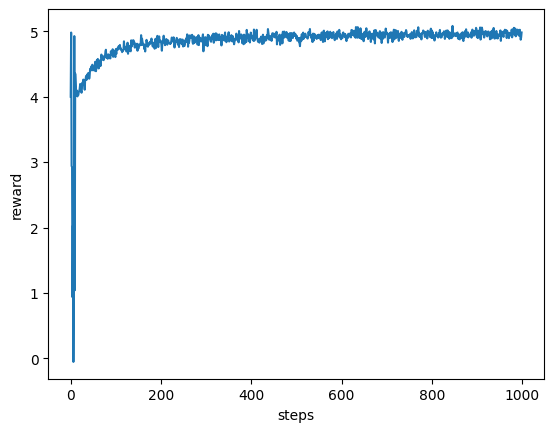

,q_star,q_est,n
0,4,3.630894,21
1,5,4.923073,232
2,3,2.769621,9
3,3,2.931130,11
4,1,0.027204,3
5,2,0.952234,4
6,0,2.300467,8
7,1,0.592062,3
8,5,5.101144,707
9,1,-0.239326,2


In [18]:
df_rewards['UCB'] = rewards
plot_rewards(rewards)
display_agent(agent, bandit)

<AxesSubplot: >

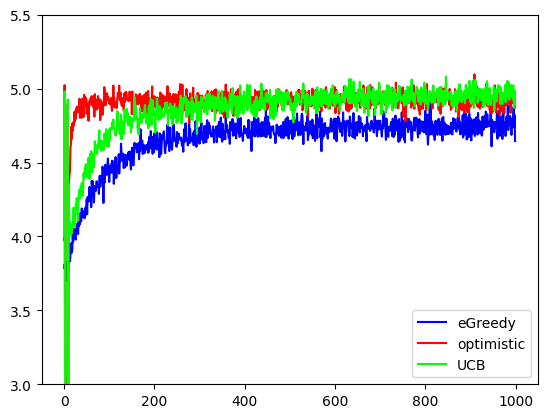

In [19]:
df_rewards.plot(colormap = 'brg', ylim=[3, 5.5])